In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# for this forget about neuralk netowkrs and focus on mathematical expressions
# nn are subset of function so anything that applies on functions
# applies on neural netowkrs as well
#  be it any funcition optimization methods etcFFFF


In [2]:
def f(x):
  return 3*x**2 - 4*x + 5

In [3]:
f(3.0)

20.0

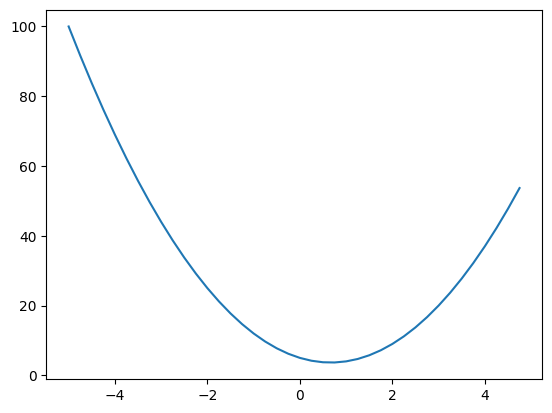

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

In [7]:
h = 0.000001
x = 2/3 # slope is zero no change almost

change_in_f = (f(x + h) - f(x))
print(change_in_f)

chaneg_per_unit = change_in_f/h
(f(x + h) - f(x))/h




2.999378523327323e-12


2.999378523327323e-06

In [10]:
h = 0.000001
x = -3

change_in_f = (f(x + h) - f(x))
print(float(change_in_f))

chaneg_per_unit = change_in_f/h

float((f(x + h) - f(x))/h)

-2.1999997002808414e-05


-21.999997002808414

In [11]:
# les get more complex
# So here the function is depended on 3 varaibales and we are intetrsed in looking
# at how each of these are affecting our final function

a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print(d)

4.0


In [12]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# So we take derivatove of our final function wrt a , so a will be bumped by h
# so d1 and d2 represent function of a and a+h

d1 = a*b + c
a += h
d2 = a*b + c

# lets print d1
print('d1', d1)
print('d2', d2)

# will d2 be slightly greater than 4 or less than 4, can you analyse that from looking at function
# so since b is -ve increasing a will cause function to decrease hence we expect value to go down


print('slope', (d2 - d1)/h) # per unit change which is called slope,


d1 4.0
d2 3.999699999999999
slope -3.000000000010772


In [13]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# So we take derivatove of our final function wrt a , so a will be bumped by h
# so d1 and d2 represent function of a and a+h

d1 = a*b + c
b += h
d2 = a*b + c

# lets print d1
print('d1', d1)
print('d2', d2)

# will d2 be slightly greater than 4 or less than 4, can you analyse that from looking at function
# so since a is +ve increasing a will cause function to decrease hence we expect value to go down


print('slope', (d2 - d1)/h) # per unit change which is called slope,


d1 4.0
d2 4.0002
slope 2.0000000000042206


In [14]:
h = 0.0001

# inputs
a = 2.0
b = -3.0
c = 10.0

# So we take derivatove of our final function wrt a , so a will be bumped by h
# so d1 and d2 represent function of a and a+h

d1 = a*b + c
b += h
d2 = a*b + c

# lets print d1
print('d1', d1)
print('d2', d2)

# similairily for c


print('slope', (d2 - d1)/h) # per unit change which is called slope,

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [17]:
# So now we have some intutitve of what derivates are .

# and we will dive in our neural netoworks
# Neural netowkrs are very big expressions and its is not possible to write them like this and do the same analysis
# for calculating gradients


# So we need some good data structures for represnting these expression of large computations and functions
# which wahat neurla networks are - they are large functions /expressions where output of one expression
# becomes input of other expression



In [20]:
# lets start of with this skelton which is a data structure for holding
# value of variables in our expression , it keeps simple scaler values



class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data


 # python calls this function when print is called with object , in our case Value objhect
  def __repr__(self):
    return f"Value(data={self.data})"

a = Value(2.0)
print(a)

Value(data=2.0)


In [21]:
# so lets take two variables and add them

a = Value(2)
b = Value(-3.0)

a+b

TypeError: ignored

In [34]:
class Value:

    def __init__(self, data, _children=(), _op='', label=''):
      self.data = data



    # without repr it just prints some ugly thing
    # def __repr__(self):
    #   return f"Value(data={self.data})"

a = Value(2.0)
print(a)

In [29]:
# there is error because doesnt know yet how to add two value objects
# So we have to ovverride dunder method in this case lets use special mehtod __add__

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
      self.data = data


    def __repr__(self):
      return f"Value(data={self.data})"


    # now python will internally call this on object when it sees + operator
    # passing the value to be added to this as argument

    def __add__(self, other):
      # this op here is typical floating point addition simply
      out = Value(self.data + other.data, (self, other), '+')
      return out


# So now if we doo
a = Value(2)
b = Value(-3.0)


print(a.__add__(b))



Value(data=-1.0)


In [36]:
# similarily we can add multiply operation to our data structure

class Value:

    def __init__(self, data, _children=(), _op='', label=''):
      self.data = data


    def __repr__(self):
      return f"Value(data={self.data})"


    # now python will internally call this on object when it sees + operator
    # passing the value to be added to this as argument

    def __add__(self, other):
      # this op here is typical floating point addition simply
      out = Value(self.data + other.data, (self, other), '+')
      return out

    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other), '*')
      return out


# So now if we doo
a = Value(2)
b = Value(-3.0)
c = a*b

# So
d =( a+b )*c

e = (a.__add__(b)).__mul__(c)
# both of above expression should be equal as we can see ,


print(a*(b),d,e)

Value(data=-6.0) Value(data=6.0) Value(data=6.0)


In [ ]:
# So now we have building block for evaluating the ecpressions and addin operations
# what is missing is connectivity , which is basically keeps track of which value produces which value
# so essentially we can keep track of connectivity in our expression graph/compute graph
# So lets dive in !!!

In [42]:
class Value:


    # lets add another vauable which will keep track of chidren of this value
    # essentially which values are affecting/creating current value
    # So for example d is getting affected by value returned from a+b and c

    def __init__(self, data, _children=(), ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)


    def __repr__(self):
      return f"Value(data={self.data})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      out = Value(self.data + other.data, (self, other))
      return out

    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other))
      return out

a = Value(2)
b = Value(-3.0)
c = Value(10.0)
# So now if we write this expression and calcualte d which is again a value

# Value(a+b)
# Value (c)
# are prev of d

d= a*b + c
d

Value(data=4.0)

In [43]:
d._prev


{Value(data=-6.0), Value(data=10.0)}

In [57]:
# We also need to know which operation created this value as well right?
# So lets also include that in our data structure

class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op


    def __repr__(self):
      return f"Value(data={self.data})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')
      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')
      return out

a = Value(2)
b = Value(-3.0)
c = Value(10.0)
# So now if we write this expression and calcualte d which is again a value

# Value(a+b)
# Value (c)
# are prev of d

d= a*b + c
d



Value(data=4.0)

In [58]:
# Now because these expressions tend to get large in case of neural netowrks
# we need a way to be able to visualize the expression graphs for verification
# i am going to copy paste some code which looks scary but dont worry about it
# as we are not concerned with how we drew it but wha t we are drawing


In [65]:
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right

    nodes, edges = trace(root)
    for n in nodes:
      uid = str(id(n))
      # for any value in the graph, create a rectangular ('record') node for it
      # dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

      # these op nodes are not Vlaues they are just being created for visual representation
      if   hasattr(n, 'grad')  and hasattr(n, 'label') :

         dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.grad), shape='record')

      elif  hasattr(n, 'label') :
        # for any value in the graph, create a rectangular ('record') node for it
          dot.node(name = uid, label = "{  %s | data %.4f }" % ( n.label,n.data), shape='record')
      else :
        dot.node(name = uid, label = "{ data %.4f }" % ( n.data), shape='record')

      if n._op:
        # if this value is a result of some operation, create an op node for it
        dot.node(name = uid + n._op, label = n._op)
        # and connect this node to it
        dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
      # connect n1 to the op node of n2
      dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

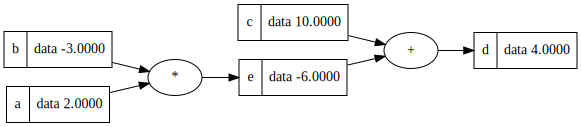

In [66]:
# It creates a new function draw_dot which draws,
#you can take a look at graphviz for detail

draw_dot(d)

In [67]:
# lets just add labels so that we can put a name on Values for readibility of above graph

class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label


    def __repr__(self):
      return f"Value(data={self.data})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')
      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')
      return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
d




Value(data=4.0)

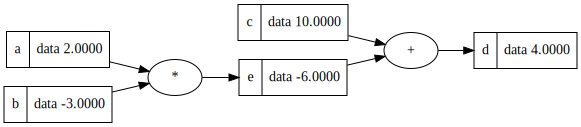

In [68]:
draw_dot(d) # so now we have a lable in graph that we can see , good visually

In [69]:
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

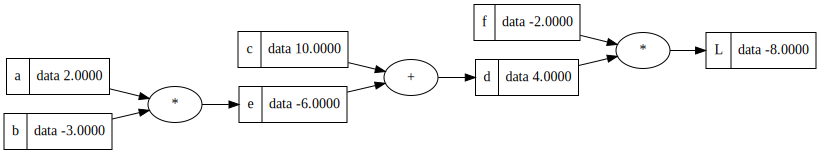

In [70]:
draw_dot(L)

In [ ]:
# So lets recap what we have so far
# We are able to build out mathamatical expression using + and * so far
# they are scaler valued and we can do a forward pass to compute the value of expression
# so multiple inputs going into math expression as above giving out single output L

# SO what we would like to do next is like to run backpropagation
# So we are going ot start at the end , and calculate gradient for every single value here , we are going

# Because in neural netowrks we are intersted in gettig gradeints wrt variables , so thats why we are intetsted
# in getting gradeint of final value wrt all values in expression



In [ ]:
# So now lets create a value inside the Value class thayt maitains derivatitve of
# final value wrt that value

In [71]:
class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label

      # initilaly 0 , basically means no affect , so no value is affecting another value by default
      self.grad = 0


    def __repr__(self):
      return f"Value(data={self.data})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')
      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')
      return out

a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0)

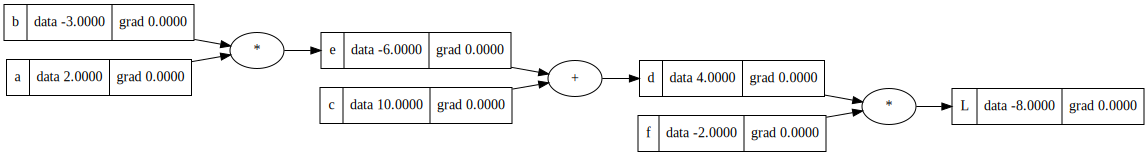

In [72]:
draw_dot(L)

In [78]:
# So now we are getting ready to implement the backprop, now lets fill in these gradeints manually


# So derivateive of L wrt L would be 1

# using function to not change global scope for now
# we can calculate derivate by first principles
def lol():

  h = 0.00001

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')


  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  L = d * f; L.label = 'L'
  L1 = L.data

  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')





  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0+h, label='f')
  L = d * f; L.label = 'L'
  L2 = L.data




  # this gives 4 as expected
  print((L2 - L1)/h)

  # So this should print derivateive wrt b , since we bumped b

lol()


# So if we know how how d impacts L and we know how d is impacte by c , intutitvely we should combine them
# to get final value which is what chain rule is right??

# ============================================================

# So now we have this little plus node which took c and e and it doesnt know anything about rest of graph
# it took c and e and created d , this node knows that how its ouptu d is affected by its inputs i.e
# c and e right?? So this little guy has no golbal knowledge and thats why we can call thses local gradients
# Now in general case any node could be very deep away from final output value

# The chain rule helps here right since we saw that if you have  dL/dd
# and you know dd/dc and dd/de you can multiply both of them indivually to know
# what would be gradient of final value wrt the incoming values






4.000000000026205


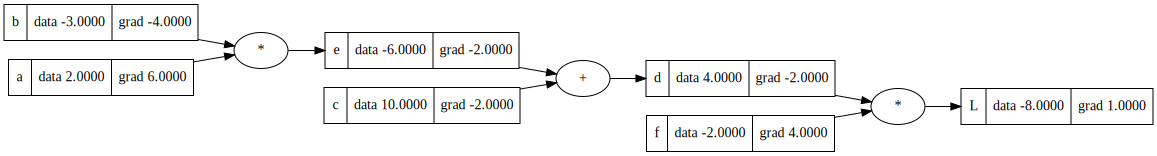

In [81]:
  L.grad = 1
  c.grad = -2.
  e.grad = -2

  # L = d+ f
  # dL/dd =f
  # dL/df = d

  # f.grad = 4.0 f's value
  f.grad = 4
  d.grad = -2



  # So this backprop is carrying the value backwards , + node simply distributes the gradient to all
  # its children node


  # ============================================================

# So now we have this little mul node which took a and b and it doesnt know anything about rest of graph
# it took a and b and created e , this node knows that how its ouptu d is affected by its inputs i.e
# c and e right?? So this little guy has no golbal knowledge and thats why we can call thses local gradients
# Now in general case any node could be very deep away from final output value

  a.grad = -2*-3
  b.grad = -2*2


  draw_dot(L)

In [82]:
# lets try to nudge our inputs in direction of gradeiint
# we should expect the final value to increase
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data) # so earlier it was -8 and now its greater than date
# So see now moving in direction of gradient of each value individually out final value
# goes up
# So this is one step of optimization , so gradients give us power to positively influence
# the final value which is what we need in neural netoiwrks

-7.286496


In [88]:
######################################################################

# Now lets dive into neuralnetowkrs back , lets look at single perceptron for now

# usually at end of our NNs we have some squashing functions

# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# o = n.tanh(); o.label = 'o'

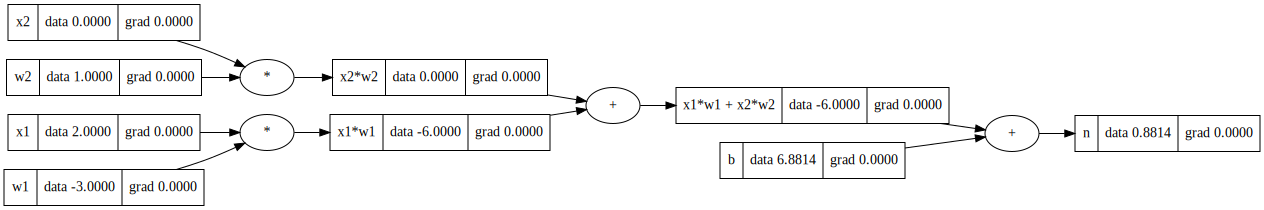

In [91]:
draw_dot(n)

In [94]:
# the only thing that matters is just any functions local derivative can be calulated
#thats is the main thing we need to focus on for our purpose as we saw above

# so either we can implement ops like exp , div etc which is required for tanh
# or we can directly implement tanh and its local derivate and be setr


class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self.grad = 0.0


    def __repr__(self):
      return f"Value(data={self.data})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')
      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')
      return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')


          return out

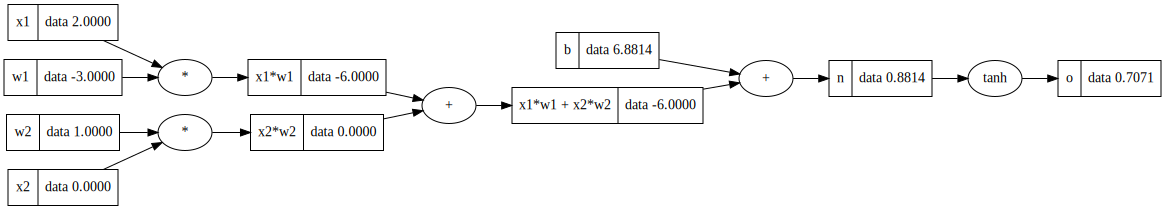

In [99]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron

# chaing this to number
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [ ]:
# So now lets do backproop , wjat we care about is just the derivatives wrt weights w, lets do it manually now again

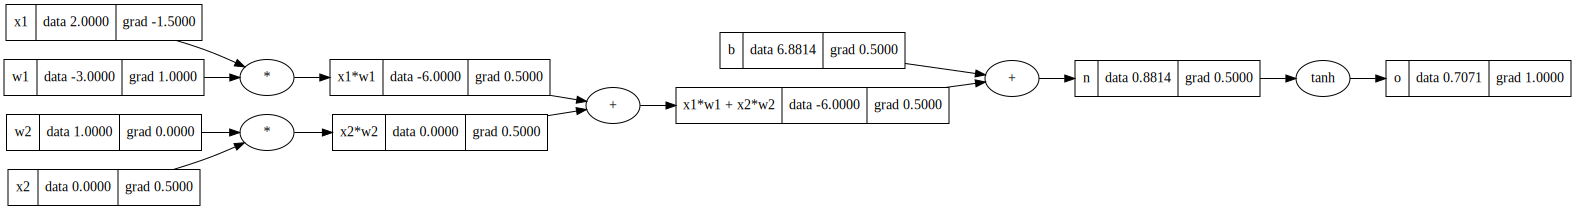

In [105]:
o.grad = 1.0 # grad of value wrt itself
# now we need do/dn
# do /dn = 1-tanh^2 = 1-- oo^2

# so n.grad = local grad * do/dn =
n.grad = 1* (1-o.data**2)

# So next we have next local grad 1

x1w1x2w2.grad = 0.5 # 1* incoming grad = do/dn = 0.5 = 1*.5
# similarily
b.grad = 0.5

# next another + node , means distriuvute the gradient i. elocal grad of + is distributing grad
x1w1.grad = 0.5
x2w2.grad = 0.5


# now again we have mult which just
# local grad = w2.data  and x2.data
# incoming grad - x2w2.grad
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

# similariuly
x1.grad = w1.data * x1w1.grad
w1.grad = x1.data *x1w1.grad


draw_dot(o)





In [ ]:
## LETS PUT END TO OUR SUFFERING OF MANUALLY CALCULATING THIS , YOU SEE WHY WRITING FLAT GRADIENTS
## IS SO TEDIOUS AND NOT A GOOD PRACTICE

In [201]:
# Lets add another thing called backward
# this function


class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self._backward = lambda : None # default dont do anything , for leaf node by default there is nothing to do
      self.grad = 0

    def __repr__(self):
      return f"Value(data={self.data} Label= {self.label})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')

      # we want to take local derivates and multiply with ioncoming derivatives
      def _backward():

          # so basically this nodes takes in incoming grad of final function
          # multiplies by local grad which is 1
          # and updates the grad of its children to downstream grads
          # we ssaw this happening visually
          # out is output Value which carries it owns grad which is upstream grad
          # for this node

          self.grad = 1.0 * out.grad
          other.grad = 1.0 * out.grad

      out._backward = _backward


      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')

      def _backward():
          # local derivative is others.data for self and self.data for other


          self.grad = other.data * out.grad
          other.grad  = self.data * out.grad



      out._backward = _backward

      return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')

          def _backward():

            # inly a single input to this so one grad calc
            # local grad is 1-t**2

            self.grad += (1 - t**2) * out.grad
          out._backward = _backward

          return out






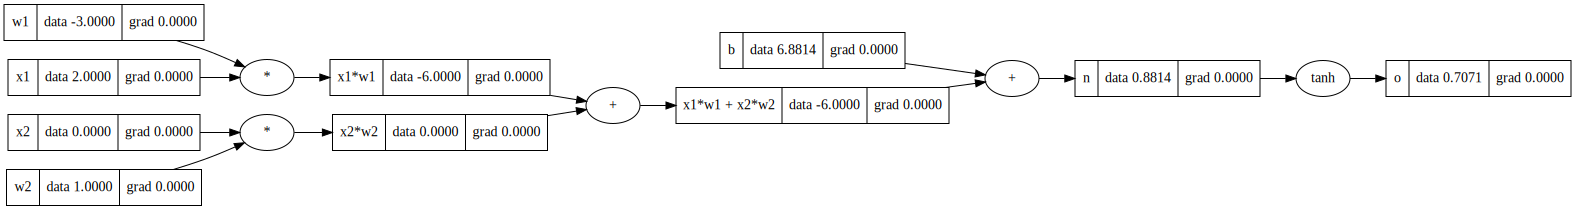

In [162]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron

# chaing this to number
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [163]:
#  now lets use our backward function to calcultate gradeints for us
# lets set based case
o.grad = 1.0

# this should update
o._backward()

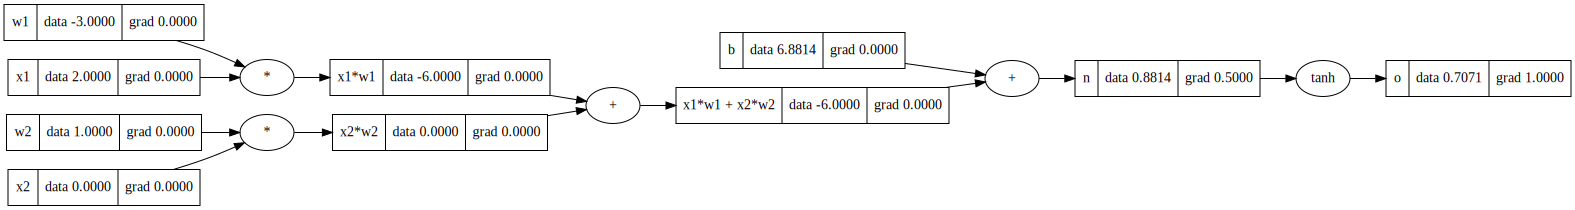

In [145]:
draw_dot(o)

In [146]:
n._backward()

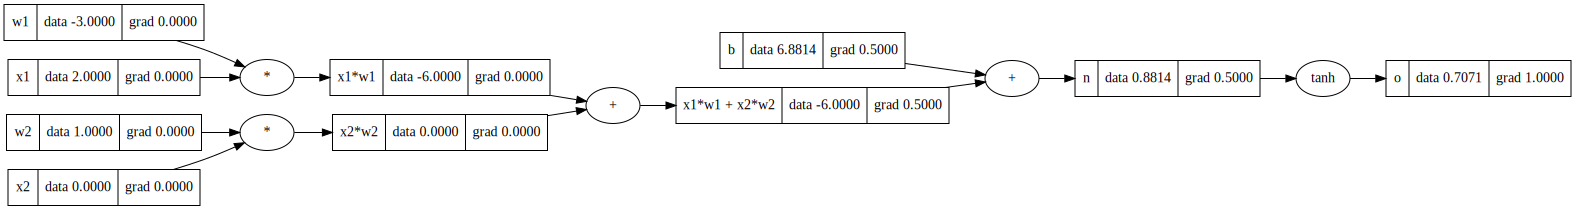

In [147]:
draw_dot(o)

In [148]:
x1w1x2w2._backward()

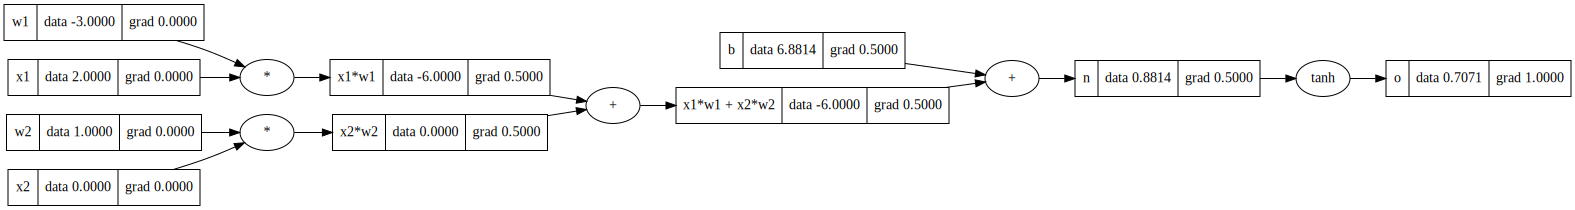

In [149]:
draw_dot(o)

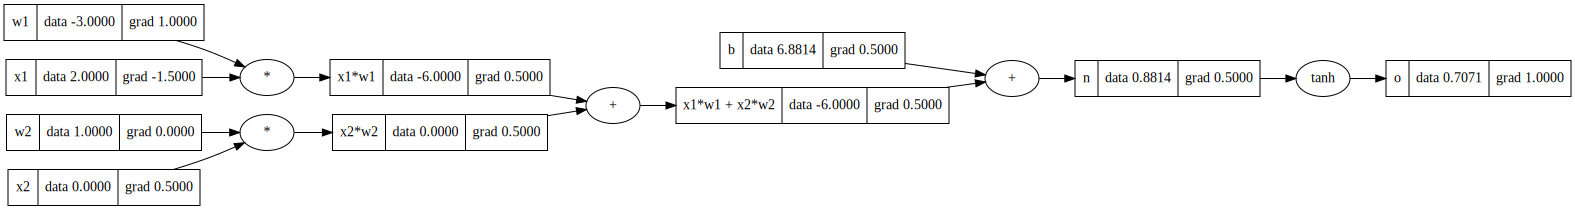

In [150]:
x1w1._backward()
x2w2._backward()
draw_dot(o)

In [151]:
########### So now we dont have to do all of this manual lly ##################


# One more thing remains . we do not want to call .backward manually for every node
# we need to call them in specific order , such that we call backward on children only when parent backward
# has been called and we want to enforce this oder , so topolical sort is one such way to achieve this requirement



In [164]:
# so this starts at root node ,

topo = []
visited = set()
def build_topo(v):

  # starting at root node , for us its o , we mark it as visited if not
  if v not in visited:
    visited.add(v)

    # iterates through all of children
    for child in v._prev:
      build_topo(child)

   # after children is done it adds itself
    topo.append(v)

# So thats how this function is guarentting that you will be in list only when your childrens has been added
build_topo(o)
topo

[Value(data=6.881373587019543 Label= b),
 Value(data=-3.0 Label= w1),
 Value(data=2.0 Label= x1),
 Value(data=-6.0 Label= x1*w1),
 Value(data=1.0 Label= w2),
 Value(data=0.0 Label= x2),
 Value(data=0.0 Label= x2*w2),
 Value(data=-6.0 Label= x1*w1 + x2*w2),
 Value(data=0.8813735870195432 Label= n),
 Value(data=0.7071067811865476 Label= o)]

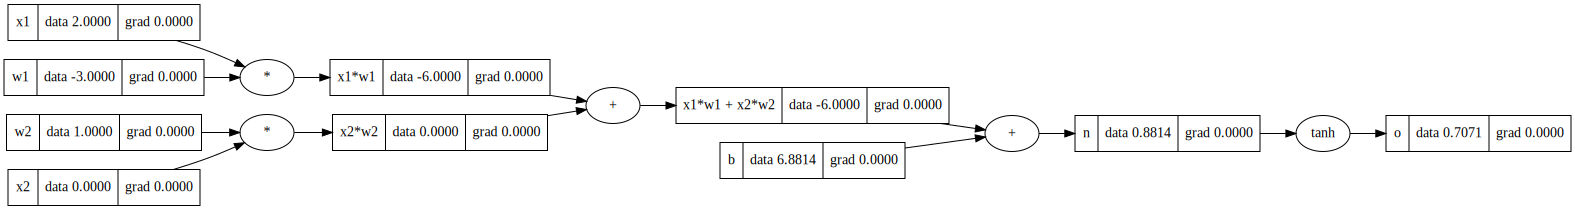

In [165]:
# lets reset the gradient and draw graph once
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron

# chaing this to number
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

In [170]:
# so now wer start in reverse order of topo and just call backwards to calculate our gradients
o.grad = 1 # base case
build_topo(o)
for node in reversed(topo):
  node._backward()

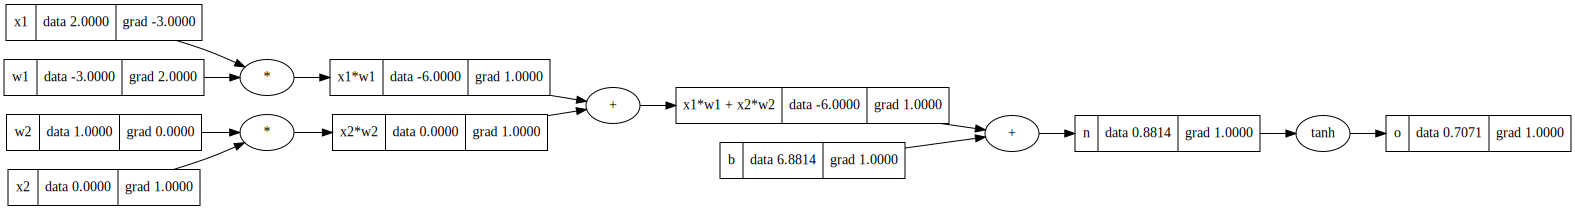

In [171]:
draw_dot(o)

In [204]:
# lets just add this to our value class only

class Value:


    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self._backward = lambda : None # default dont do anything , for leaf node by default there is nothing to do
      self.grad = 0

    def __repr__(self):
      return f"Value(data={self.data} Label= {self.label})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')

      # we want to take local derivates and multiply with ioncoming derivatives
      def _backward():

          # so basically this nodes takes in incoming grad of final function
          # multiplies by local grad which is 1
          # and updates the grad of its children to downstream grads
          # we ssaw this happening visually
          # out is output Value which carries it owns grad which is upstream grad
          # for this node

          self.grad = 1.0 * out.grad
          other.grad = 1.0 * out.grad

      out._backward = _backward


      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')

      def _backward():
          # local derivative is others.data for self and self.data for other


          self.grad = other.data * out.grad
          other.grad  = self.data * out.grad



      out._backward = _backward

      return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')

          def _backward():

            # inly a single input to this so one grad calc
            # local grad is 1-t**2

            self.grad += (1 - t**2) * out.grad
          out._backward = _backward

          return out


    def backward(self):

      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      self.grad = 1.0
      for node in reversed(topo):
        node._backward()





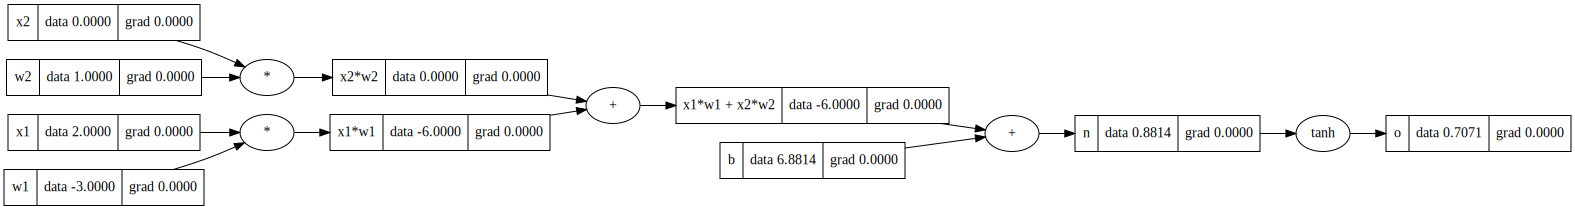

In [206]:
# lets reset the gradient and draw graph once
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron

# chaing this to number
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
draw_dot(o)

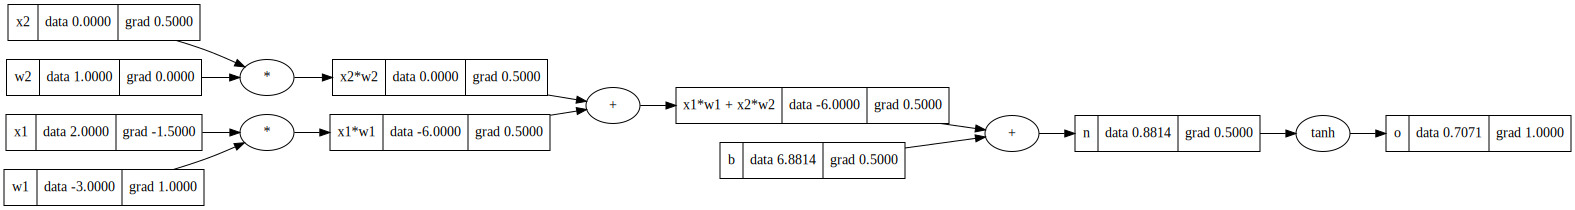

In [207]:
o.backward()
draw_dot(o)

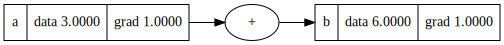

In [208]:
########### There is still a bug in our implementation ###############

a = Value(3.0,label='a')
b = a+a
b.label = 'b'
b.backward()
draw_dot(b)

# # the grad is not one , since b is resilt of a+a and if we go to backward of a then

#  def __add__(self, other):




#       out = Value(self.data + other.data, (self, other),'+')

#       # we want to take local derivates and multiply with ioncoming derivatives
#       def _backward():

#           # when self and other are exact same object we are overwriting the gradient
#           # thats why it stays at 1
#           # this will occur if we use variable more than once



#           # solition for this would be to have accumulating gradients for variable


#           self.grad = 1.0 * out.grad
#           other.grad = 1.0 * out.grad

#       out._backward = _backward


#       return out

In [211]:
# lets just add this to our value class only
class Value:

    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self._backward = lambda : None # default dont do anything , for leaf node by default there is nothing to do
      self.grad = 0

    def __repr__(self):
      return f"Value(data={self.data} Label= {self.label})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      out = Value(self.data + other.data, (self, other),'+')

      # we want to take local derivates and multiply with ioncoming derivatives
      def _backward():

          # so basically this nodes takes in incoming grad of final function
          # multiplies by local grad which is 1
          # and updates the grad of its children to downstream grads
          # we ssaw this happening visually
          # out is output Value which carries it owns grad which is upstream grad
          # for this node

          self.grad += 1.0 * out.grad
          other.grad += 1.0 * out.grad

      out._backward = _backward


      return out

    # in case of mult it should be *
    def __mul__(self, other):
      out = Value(self.data * other.data, (self, other),'*')

      def _backward():
          # local derivative is others.data for self and self.data for other


          self.grad += other.data * out.grad
          other.grad  += self.data * out.grad



      out._backward = _backward

      return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')

          def _backward():

            # inly a single input to this so one grad calc
            # local grad is 1-t**2

            self.grad += (1 - t**2) * out.grad
          out._backward = _backward

          return out


    def backward(self):

      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      self.grad = 1.0
      for node in reversed(topo):
        node._backward()





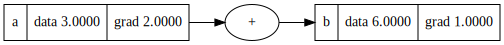

In [212]:

a = Value(3.0,label='a')
b = a+a
b.label = 'b'
b.backward()
draw_dot(b)

#############################################################################################

In [ ]:
####################### PART 2 ###########################

In [213]:
# so one thing we cant do in our value is something like

a = Value(2.0)
a+1


AttributeError: ignored

In [214]:
class Value:

    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self._backward = lambda : None # default dont do anything , for leaf node by default there is nothing to do
      self.grad = 0

    def __repr__(self):
      return f"Value(data={self.data} Label= {self.label})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      other = other if isinstance(other,Value) else Value(other)
      out = Value(self.data + other.data, (self, other),'+')

      # we want to take local derivates and multiply with ioncoming derivatives
      def _backward():

          # so basically this nodes takes in incoming grad of final function
          # multiplies by local grad which is 1
          # and updates the grad of its children to downstream grads
          # we ssaw this happening visually
          # out is output Value which carries it owns grad which is upstream grad
          # for this node

          self.grad += 1.0 * out.grad
          other.grad += 1.0 * out.grad

      out._backward = _backward


      return out

    # in case of mult it should be *
    def __mul__(self, other):

      other = other if isinstance(other,Value) else Value(other)
      out = Value(self.data * other.data, (self, other),'*')

      def _backward():
          # local derivative is others.data for self and self.data for other


          self.grad += other.data * out.grad
          other.grad  += self.data * out.grad



      out._backward = _backward

      return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')

          def _backward():

            # inly a single input to this so one grad calc
            # local grad is 1-t**2

            self.grad += (1 - t**2) * out.grad
          out._backward = _backward

          return out


    def backward(self):

      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      self.grad = 1.0
      for node in reversed(topo):
        node._backward()

In [216]:
a = Value(2.0)
a+1
a*2





Value(data=4.0 Label= )

In [217]:
2*a
# but still we cant do 2*a
# because python will try to do

# a.__mul__(2)
# python will check for something called rmul


TypeError: ignored

In [225]:
class Value:

    # so here we add another member variable _op which keeps track of
    # operation this value came from its operands

    def __init__(self, data, _children=(),_op='',label='' ):
      self.data = data
      # all the previous values that affect this
      self._prev = set(_children)
      self._op = _op
      self.label = label
      self._backward = lambda : None # default dont do anything , for leaf node by default there is nothing to do
      self.grad = 0

    def __repr__(self):
      return f"Value(data={self.data} Label= {self.label})"


    def __add__(self, other):

      # in this case children are 'self' and 'other' Value object

      # in case of add it should be +
      other = other if isinstance(other,Value) else Value(other)
      out = Value(self.data + other.data, (self, other),'+')

      # we want to take local derivates and multiply with ioncoming derivatives
      def _backward():

          # so basically this nodes takes in incoming grad of final function
          # multiplies by local grad which is 1
          # and updates the grad of its children to downstream grads
          # we ssaw this happening visually
          # out is output Value which carries it owns grad which is upstream grad
          # for this node

          self.grad += 1.0 * out.grad
          other.grad += 1.0 * out.grad

      out._backward = _backward


      return out

    # in case of mult it should be *
    def __mul__(self, other):

      other = other if isinstance(other,Value) else Value(other)
      out = Value(self.data * other.data, (self, other),'*')

      def _backward():
          # local derivative is others.data for self and self.data for other


          self.grad += other.data * out.grad
          other.grad  += self.data * out.grad



      out._backward = _backward
      return out



    def __rmul__(self, other): # other * self
      return self * other

    def __truediv__(self, other): # self / other
      return self * other**-1

    def __neg__(self): # -self
      return self * -1

    def __sub__(self, other): # self - other
      return self + (-other)

    def __radd__(self, other): # other + self
      return self + other

     # lets look at this pow function , we want to make sure its only int, float


    def __pow__(self, other):
        assert isinstance(other, (int, float)), "only supporting int/float powers for now"
        out = Value(self.data**other, (self,), f'**{other}')

        def _backward():

            # what is chain rule for power function , whats it locla grad
            # figure out wjhat we should put here
            # dx^n /dx = n * x^n-1


            self.grad += other * (self.data ** (other - 1)) * out.grad
        out._backward = _backward

        return out

    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')

        def _backward():
          self.grad += out.data * out.grad
        out._backward = _backward

        return out


    def tanh(self):
          x = self.data
          t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
          # save out as value object , children would be the current object only
          out = Value(t, (self, ), 'tanh')

          def _backward():

            # inly a single input to this so one grad calc
            # local grad is 1-t**2

            self.grad += (1 - t**2) * out.grad
          out._backward = _backward

          return out


    def backward(self):

      topo = []
      visited = set()
      def build_topo(v):
        if v not in visited:
          visited.add(v)
          for child in v._prev:
            build_topo(child)
          topo.append(v)
      build_topo(self)

      self.grad = 1.0
      for node in reversed(topo):
        node._backward()

In [226]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'
o.backward()

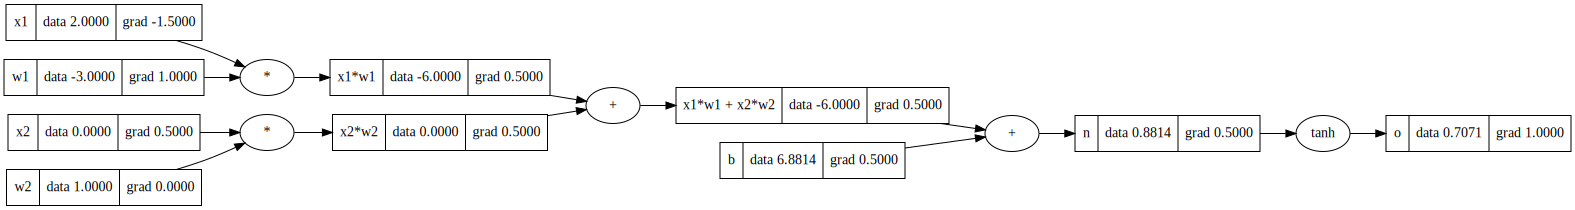

In [227]:
draw_dot(o)

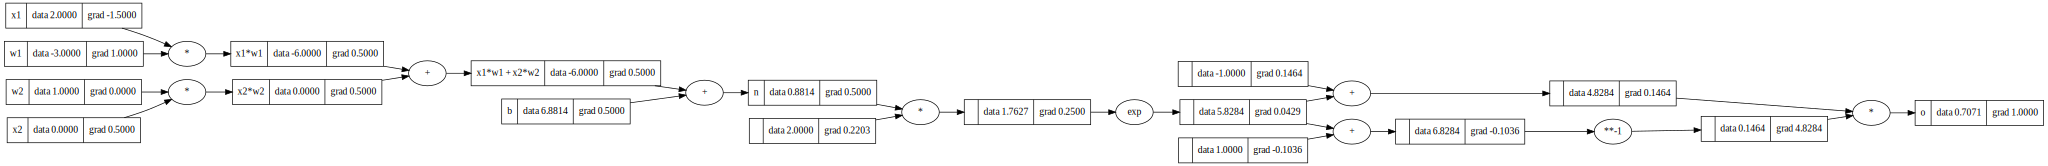

In [228]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ---- let just break up tanh to see how our new ops works ----

e = (2*n).exp()
o = (e - 1) / (e + 1) # checking if our bug is reolsved , usage of same variable
# ----
o.label = 'o'
o.backward()
draw_dot(o)

In [134]:





class Value:

  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data}, Label = {self.label})"

  def __add__(self, other):
    out = Value(self.data + other.data, (self, other), '+')
    return out

    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward

    return out

  def __mul__(self, other):
    out = Value(self.data * other.data, (self, other), '*')

    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward

    return out

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')

    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward

    return out

  def backward(self):

    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)

    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = Value(10.0, label='c')
e = a*b; e.label = 'e'
d = e + c; d.label = 'd'
f = Value(-2.0, label='f')
L = d * f; L.label = 'L'
L

Value(data=-8.0, Label = L)

In [ ]:
############### lets look at our Neural Nets finally ################

In [235]:
import random


class Neuron:

  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))

  def __call__(self, x):
    # w * x + b
    # forward pass
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out

  def parameters(self):
    return self.w + [self.b]

In [238]:
x = [2.0, 3.0] # total no of weight values equal to number of ouputs , vector input
n = Neuron(len(x))# this onvokes call special method
n(x)


Value(data=0.6385948889275548 Label= )

In [244]:


# this is for layer of neurons bunch of neurons stacked in single layer
class Layer:

  def __init__(self, nin, nout): # nin  = no of inputs , # nout = no of outputs
    self.neurons = [Neuron(nin) for _ in range(nout)]

  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs

  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]



In [245]:
class MLP:

  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]

  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x

  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]

In [241]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)

Value(data=0.6206806967887993 Label= )

In [242]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

In [ ]:
ypred = [n(x) for x in xs]
loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
print(loss)
# draw_dot(loss)

In [248]:
for k in range(20):

  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  print(loss)
  draw_dot(loss)


Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )
Value(data=0.006805511834787279 Label= )


In [ ]:
# backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()

  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

  print(k, loss.data)